In [118]:
from matplotlib import pyplot as plotter
import numpy as np
import pandas as pd

dataset = pd.read_csv('./datasets/weight-height.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Weight  10000 non-null  float64
 2   Height  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [119]:
dataset.drop('Gender', axis = 1, inplace = True)              # Remove unnecessary feature
dataset.drop_duplicates()                           # Removing Duplicates
dataset = dataset[dataset.notna().all(axis = 1)]    # Removing Null Records
dataset.describe()

,Weight,Height
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [120]:
# Gradient Descent Function
# ∂J/∂βᵢ = ∑ βᵤ.x̄ᵤx̄ᵢ - x̄ᵢȳ

# ∂J/∂β₀ = β₀ + β₁.x̄₁ - ȳ
# ∂J/∂β₁ = β₀.x̄₁ + β₁.x̄₁x̄₁ - x̄₁ȳ

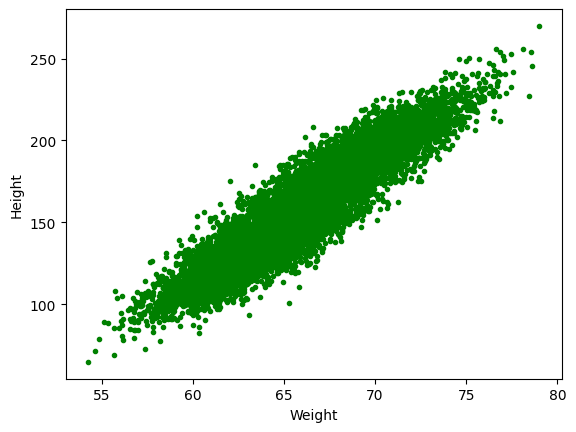

In [121]:
# visualize the data

plotter.xlabel('Weight')
plotter.ylabel('Height')
plotter.scatter(dataset['Weight'], dataset['Height'], marker='.', color='green')

In [122]:
# Check whether the data is positively correlated

# Using pearson correlation
print(dataset.corr(method = 'pearson', numeric_only = True))
print()

# Using spearman correlation
print(dataset.corr(method = 'spearman', numeric_only = True))

# Verdict :- Both Method shows strong correlation

          Weight    Height
Weight  1.000000  0.924756
Height  0.924756  1.000000

          Weight    Height
Weight  1.000000  0.925708
Height  0.925708  1.000000


In [123]:
# Create Alias for dependent and independent features
X = dataset[['Weight']]     # Independent features must be a dataframe (2D array)
Y = dataset['Height']       # Dependent feature must be a Series (1D array)

print(type(X))
print(X.shape)              # In multiple regression, no of columns will increase
print()                     # Hence input features must be a dataframe

print(type(Y))
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
(10000, 1)

<class 'pandas.core.series.Series'>
(10000,)


Training Data Shape: (7500, 1) (7500,)
Testing Data Shape: (2500, 1) (2500,)


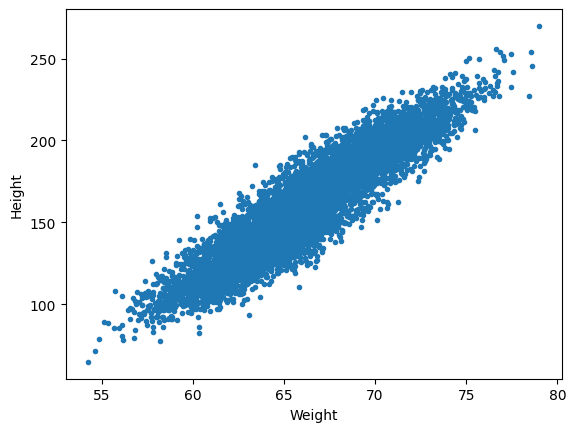

In [124]:
# Split the Dataset into two parts :- Training and Test Data
from sklearn.model_selection import train_test_split

(X_Train, X_Test, Y_Train, Y_Test) = train_test_split(X, Y, test_size = 0.25, random_state = 25)

print("Training Data Shape:", X_Train.shape, Y_Train.shape)
print("Testing Data Shape:", X_Test.shape, Y_Test.shape)

plotter.xlabel('Weight')
plotter.ylabel('Height')
plotter.scatter(X_Train, Y_Train, marker = '.')

In [125]:
# Standardization of Input Features of Test Data using z-score
# Gradient Descent runs faster (reaches optima quickly)

# Note :- Don't standardize output features

# Three Main Functions in StandardScaler
# 1. fit() - learns the parameters of given dataset
# 2. transform() - applies the normalization on the dataset using the data learned using fit() method
# 3. fit_transform() - does both at once

# Note :- we should only fit() on training data. 
#         If fit() is done on test data, Model cheats by learning about test data
#         This is called data leakage.
#         Hence test data should also be standardized using training data parameters

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()               # make scaler object

scaler.fit(X_Train)                     # learn mean and standard deviation of training data
X_Train_Normalized = scaler.transform(X_Train)     # transform training data using μ = μᵗ and σ = σᵗ

# standardize the test data using μ and σ of Training data. To avoid leakage
X_Test_Normalized = scaler.transform(X_Test)       # transform test data using μ = μᵗ and σ = σᵗ

print(X_Train_Normalized); print(X_Train_Normalized.shape)
print()
print(X_Test_Normalized); print(X_Test_Normalized.shape)

[[ 0.54334932]
 [ 2.12981707]
 [-1.151528  ]
 ...
 [ 1.67777563]
 [-1.09170709]
 [-1.05464561]]
(7500, 1)

[[ 0.09462019]
 [ 0.55765699]
 [-0.32355534]
 ...
 [ 0.63158716]
 [ 1.11745023]
 [-0.48485199]]
(2500, 1)


In [126]:
# Apply Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs = -1)        # Make Regression Model Object
# n_jobs parameters for no. of processors used

model.fit(X_Train_Normalized, Y_Train)       # train the model on training data

intercept = model.intercept_       # get the intercept and coeff for the linear model
coefficients = model.coef_         # Y = β₀ + β₁.X

print('Model Trained:', f'Height = ({intercept}) + ({coefficients[0]}).Weight')

Model Trained: Height = (161.4116594689076) + (29.65398938619898).Weight


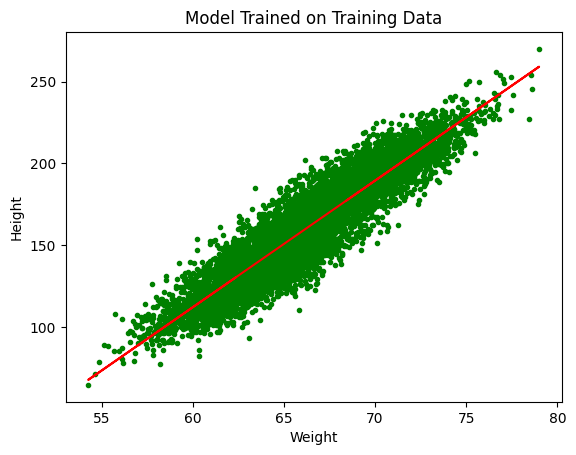

In [127]:
# Prediction on Training Data

plotter.title('Model Trained on Training Data')
plotter.xlabel('Weight')
plotter.ylabel('Height')

plotter.scatter(X_Train, Y_Train, marker = '.', color = 'green')
Y_Train_Predicted = model.predict(X_Train_Normalized)
plotter.plot(X_Train, Y_Train_Predicted, color = 'red')

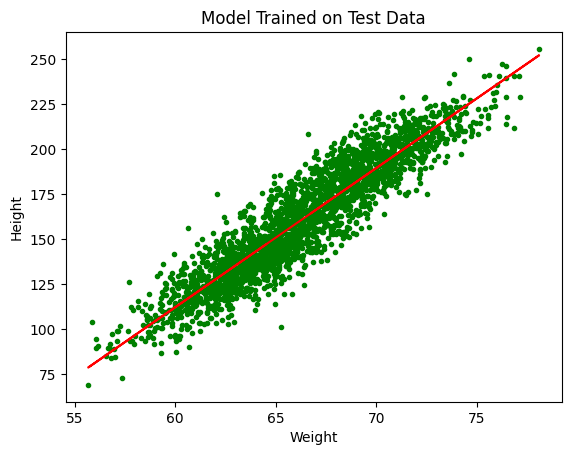

In [128]:
# Prediction on Test Data

plotter.title('Model Trained on Test Data')
plotter.xlabel('Weight')
plotter.ylabel('Height')

plotter.scatter(X_Test, Y_Test, marker = '.', color = 'green')
Y_Test_Predicted = model.predict(X_Test_Normalized)
plotter.plot(X_Test, Y_Test_Predicted, color = 'red')

In [129]:
# Analysis of Performance Metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, root_mean_squared_error as rmse

mean_sq_err = mse(Y_Test, Y_Test_Predicted)
mean_abs_err = mae(Y_Test, Y_Test_Predicted)
root_mean_sq_err = rmse(Y_Test, Y_Test_Predicted)

print(f'Mean Square Error : {mean_sq_err}')
print(f'Mean Absolute Error : {mean_abs_err}')
print(f'Root Mean Square Error : {root_mean_sq_err}')

Mean Square Error : 151.78651312676791
Mean Absolute Error : 9.837176507161761
Root Mean Square Error : 12.32016692771522


In [130]:
# Analysis of Accuracy (Variability) using R² score
# R² = 1 - SS⁽ʳᵉˢ⁾/SS⁽ᵗᴼᵗᵃˡ⁾ 
# Adjusted R² = 1 - (1 - R²).(n - 1)/(n - p - 1)

from sklearn.metrics import r2_score

r2score = r2_score(Y_Test, Y_Test_Predicted)
print('R² Score:', 100*r2score, '%')

observations = Y_Test.shape[0]
adjusted_r2_score = 1 - (1 - r2score)*(observations - 1)/(observations - 1 - 1)
print('Adjusted R² Score:', 100*adjusted_r2_score, '%')

R² Score: 85.40371667867713 %
Adjusted R² Score: 85.3978734907983 %


In [131]:
# Using OLS Linear Regression (Regression using empirical Formula)

from statsmodels.api import OLS

OLSModel = OLS(Y_Train, X_Train_Normalized)
OLSModel = OLSModel.fit()
print(OLSModel.summary())

Y_Test_Predicted_OLS = OLSModel.predict(X_Test_Normalized)

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                    9.00e-56
Time:                        20:51:59   Log-Likelihood:                         -48793.
No. Observations:                7500   AIC:                                  9.759e+04
Df Residuals:                    7499   BIC:                                  9.759e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Predicting for New Data

weight = float(input('Enter the Weight (in kgs)'))

input = pd.DataFrame({'Weight': [weight]})              # Standardize the input before predicting
input_standardized = scaler.transform(input)

height_predicted = model.predict(input_standardized)
print(f'Predicted Height for {weight}kgs: {round(height_predicted[0], 1)}cms')

Predicted Height for 70.0kgs: 189.5cms
